Los modelos tradicionales de series de tiempo son modelos univariados y se analizan con las siguientes fases:

1. *Identificación*: En este proceso se analizan los datos usando la Función de Autocorrelación o la Función Parcial de Autocorrelación para identificar patrones en la serie y después para hacer pruebas estadísticas.

2. *Estimación*: Esta parte está relacionada con la estimación de los coeficientes de los modelos.

3. *Diagnóstico*: Una vez estimados los parámetros, revisar la *identificación* para verificar si el modelo es válido. Si es válido, se puede pasar a la otra fase:

4. *Pronóstico*: Durante esta fase se analiza el rendimiento del modelo y, por último, se hacen pronósticos con las estimaciones ya realizadas.

El objetivo al modelar series de tiempo es ajustar un modelo y comprender el carácter estadístico de una serie de tiempo, que fluctúa aleatoriamente en el tiempo.

Un proceso con variables aleatorias independientes e idénticamente distribuidas (IID) es un modelo de serie de tiempo temporal fundamental, en ocasiones se denomina *ruido blanco*.

La serie de tiempo $\epsilon_{t}$ se dice que tiene ruido blanco si satisface 

$$\epsilon_{t} \sim WN(0,\sigma^2_{\epsilon})$$ con $$Corr(\epsilon_{t},\epsilon_{s})=0, s \neq t$$

Es decir, la serie de tiempo tiene media $0$ y varianza constante y no hay correlación entre las variables.
La falta de correlación hace que el modelo no tenga una buena intuición de pronóstico.

Simulación de ruido blanco con 2000 datos.

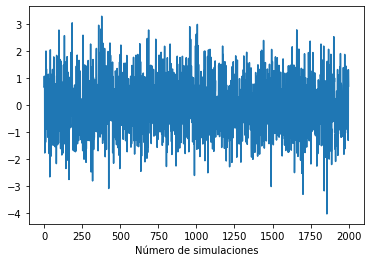

In [1]:
import pandas as pd, numpy as np, statistics, matplotlib.pyplot as plt
mu = 0
std = 1
WN = np.random.normal(mu, std, 2000)
plt.plot(WN)
plt.xlabel('Número de simulaciones')
#plt.savefig('images/WN.png')
plt.show()

La serie fluctúa alrededor de 0 pero siendo errática. Una tarea importante es determinar el número de variables *atrasadas*.
Además de la FdA y de FPdA, se puede utilizar el Criterio de Información de Akaike.

*AIC se introduce como una extensión del Principio de Máxima Verosimilitud.
La máxima verosimilitud se aplica convencionalmente para estimar los parámetros de un modelo una vez que se han formulado la estructura y la dimensión del modelo.*

$$AIC=-2\ln(MáximaVerosimilitud)+2d$$

en donde $d$ es el total de parámetros. Entonces el término $2d$ sirve como penalización de un posible sobreajuste.

También es posible utilizar el Criterio de Información Bayesiano, en donde la penalización es aun mayor:

$$BIC=-2\ln(MáximaVerosimilitud)+ln(n)*d$$

en donde $n$ es el número de observaciones.
 




### Modelo de Medias Móviles

El Modelo de Medias Móviles se puede considerar como un modelo de suavizado, ya que tiene cuenta los valores de atraso de los residuos. Se puede comenzar con MA(1):

$$X_{t}=\epsilon_{t}+\alpha\epsilon_{t-1}$$

Cuando $\alpha \neq 0$, hay una correlación no trivial. Intuitivamente MA(1) representa que la serie de tiempo está afectada solamente por los residuos en los tiempos $t$ y $t-1$.

De forma general, MA(q) se puede ver como:

$$X_{t}= \epsilon_{t}+\alpha_{1}\epsilon_{t-1}+\alpha_{2}\epsilon_{t-2}+ \dots + \alpha_{q}\epsilon_{t-q}$$

Analizar los precios al cierre de las acciones de Apple y Microsoft:



In [13]:
import datetime, yfinance as yf
comb = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2023, 1, 1)
stock_prices = yf.download(comb, start=start, end = end, interval='1d').Close


[*********************100%***********************]  2 of 2 completed


El estadístico Dickey Fuller sirve para hacer contraste de hipótesis respecto a la estacionalidad de una serie de tiempo

In [33]:
from statsmodels.tsa.stattools import adfuller
precio_cierre = stock_prices.dropna()
for i in comb:
    stat_test = adfuller(stock_prices[i])[0:2]
    print("El estadístico Dickey Fuller y el p-valor de {} {}".format(i,stat_test))


El estadístico Dickey Fuller y el p-valor de AAPL (-1.6813063377100126, 0.4407688353466099)
El estadístico Dickey Fuller y el p-valor de MSFT (-1.7207534002908835, 0.4204526656173502)


In [28]:
diff_precio_cierre = stock_prices.diff().dropna()
diff_precio_cierre

,AAPL,MSFT
Date,,
2019-01-03,-3.932499,-3.720001
2019-01-04,1.517498,4.529999
2019-01-07,-0.082500,0.129997
2019-01-08,0.705002,0.740005
2019-01-09,0.639999,1.469994
...,...,...
2022-12-23,-0.369995,0.539993
2022-12-27,-1.830002,-1.769989
2022-12-28,-3.989998,-2.430008


In [31]:
precio_cierre.head()

,AAPL,MSFT
Date,,
2019-01-02,39.480000,101.120003
2019-01-03,35.547501,97.400002
2019-01-04,37.064999,101.930000
2019-01-07,36.982498,102.059998
2019-01-08,37.687500,102.800003


In [36]:
split = int(len(diff_precio_cierre['AAPL'].values) * 0.95) #dividir en 95% entrenamiento y 5% testing
split

956

In [41]:
#división de los datos. Notar que los datos del testing son los últimos
diff_train_aapl = diff_precio_cierre['AAPL'].iloc[:split]
diff_test_aapl = diff_precio_cierre['AAPL'].iloc[split:]
diff_train_msft = diff_precio_cierre['MSFT'].iloc[:split]
diff_test_msft = diff_precio_cierre['MSFT'].iloc[split:]  

In [45]:
diff_train_aapl

Date
2019-01-03   -3.932499
2019-01-04    1.517498
2019-01-07   -0.082500
2019-01-08    0.705002
2019-01-09    0.639999
                ...   
2022-10-12   -0.639999
2022-10-13    4.650009
2022-10-14   -4.610001
2022-10-17    4.029999
2022-10-18    1.339996
Name: AAPL, Length: 956, dtype: float64

In [48]:
#guardar en un Excel csv
diff_train_aapl.to_csv("diff_train_aapl.csv")
diff_test_aapl.to_csv("diff_test_aapl.csv")
diff_train_msft.to_csv("diff_train_msft.csv")
diff_test_msft.to_csv("diff_test_msft.csv")


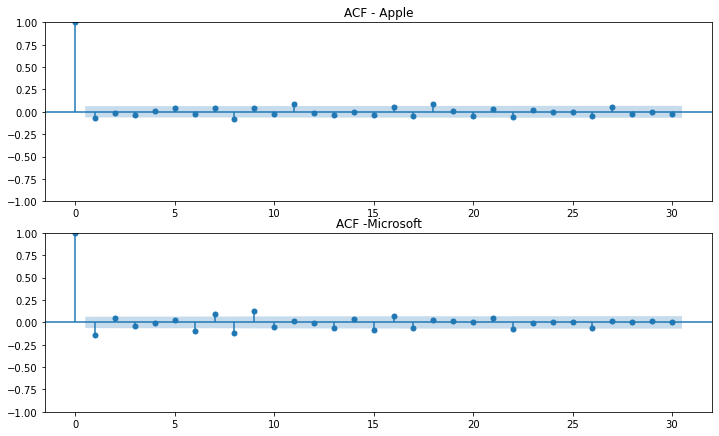

In [52]:

import statsmodels.api as sm 
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plt.tight_layout()
sm.graphics.tsa.plot_acf(diff_train_aapl,lags=30, ax=ax[0], title='ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft,lags=30, ax=ax[1], title='ACF -Microsoft')
#plt.savefig('images/acf_ma.png')
plt.show()


Para el precio al cierre de Apple observar que cuando hay 11 atrasados hay un pico significativo, al igual que en 18. Entonces es conveniente dividir en media móvil corta hasta 11 y en media móvil larga hasta 18. 

In [53]:
media_movil_corta_appl = diff_train_aapl.rolling(window=11).mean()
media_movil_larga_appl = diff_train_aapl.rolling(window=18).mean()

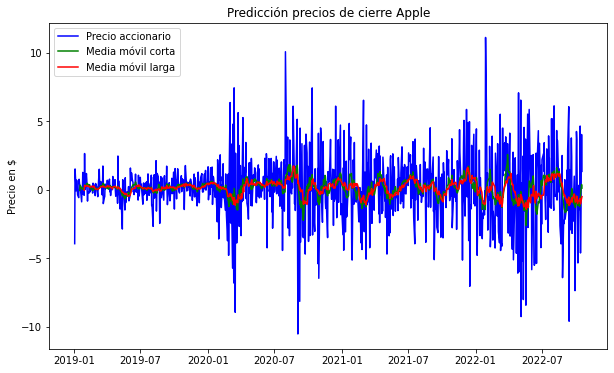

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_aapl.loc[start:end].index,
diff_train_aapl.loc[start:end],
label='Precio accionario', c='b')
ax.plot(media_movil_corta_appl.loc[start:end].index,
media_movil_corta_appl.loc[start:end],
label = 'Media móvil corta',c='g')
ax.plot(media_movil_larga_appl.loc[start:end].index,
media_movil_larga_appl.loc[start:end],
label = 'Media móvil larga',c='r')
ax.legend(loc='best')
ax.set_ylabel('Precio en $')
ax.set_title('Predicción precios de cierre Apple')
#plt.savefig('images/ma_apple.png')
plt.show()

Como era de esperar, resulta que la media móvil a corto plazo tiende a ser más reactivo al cambio diario en el precio de las acciones de Apple en comparación con la media móvil a largo plazo. Tiene sentido porque tener en cuenta una media móvil larga genera una predicción *suave*.

Similarmente con Microsoft se llega a la misma conclusión:

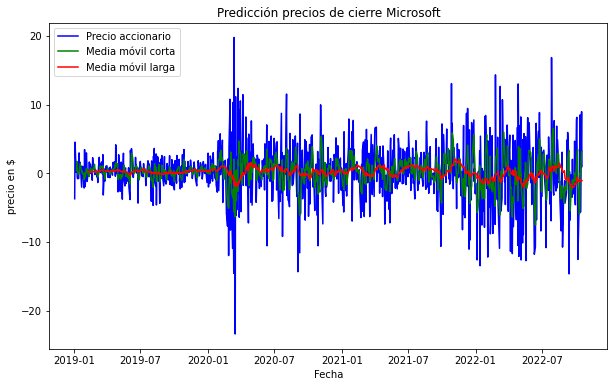

In [75]:
media_movil_corta_msft = diff_train_msft.rolling(window=4).mean()
media_movil_larga_msft = diff_train_msft.rolling(window=26).mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_msft.loc[start:end].index,
diff_train_msft.loc[start:end],
label='Precio accionario',c='b')
ax.plot(media_movil_corta_msft.loc[start:end].index,
media_movil_corta_msft.loc[start:end],
label = 'Media móvil corta',c='g')
ax.plot(media_movil_larga_msft.loc[start:end].index,
media_movil_larga_msft.loc[start:end],
label = 'Media móvil larga',c='r')
ax.legend(loc='best')
ax.set_ylabel('precio en $')
ax.set_xlabel('Fecha')
ax.set_title('Predicción precios de cierre Microsoft')
#plt.savefig('images/ma_msft.png')
plt.show()


### Modelo Autorregresivo

La dependencia en términos sucesivos es una característica particular del Modelo Autoregresivo, en el sentido de que la variable aleatoria $X_{t}$ es una combinación lineal de los valores pasados. Ar(p) se puede expresar como $$X_{t}=c+\alpha_{1}X_{t-1}+\alpha_{2}X_{t-2}+\dots+\alpha_{p}X_{t-p}+\epsilon_{t}$$

En donde $\epsilon$ son los residuos y $c$ es el intercepto.

A diferencia de la Media Móvil, la Función Parcial de Autocorrelación es una herramienta útil para encontrar el orden óptimo en el modelo autorregresivo. Esto se debe a que, en AR, el objetivo es descubrir la relación de una serie de tiempo entre dos tiempos diferentes, $X_{t}$ y $X_{t-k}$, y para hacerlo necesito filtrar el efecto de otros retrasos intermedios.

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


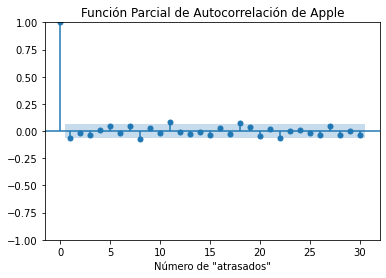

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


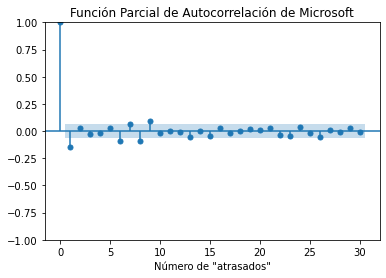

In [76]:
sm.graphics.tsa.plot_pacf(diff_train_aapl,lags=30)
plt.title('Función Parcial de Autocorrelación de Apple')
plt.xlabel('Número de "atrasados"')
#plt.savefig('images/pacf_ar_aapl.png')
plt.show()
sm.graphics.tsa.plot_pacf(diff_train_msft,lags=30)
plt.title('Función Parcial de Autocorrelación de Microsoft')
plt.xlabel('Número de "atrasados"')
#plt.savefig('images/pacf_ar_msft.png')
plt.show()


Segmentar en el número 11 para Apple y en el número 9 para Microsoft.

In [77]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [85]:
ar_aapl = AutoReg(diff_train_aapl.values, lags=11) #ajuste de modelo
ar_fitted_aapl = ar_aapl.fit()

In [121]:
ar_predictions_aapl = ar_fitted_aapl.predict(start=len(diff_train_aapl), #predicciones
end=len(diff_train_aapl)\
+ len(diff_test_aapl) - 1,
dynamic=False)

In [122]:
for i in range(len(ar_predictions_aapl)):
    
    print('==' * 10)
    print('predicted values:{:.4f} & actual values: {:.4f}'.format(ar_predictions_aapl[i], diff_test_aapl[i]))

predicted values:0.7364 & actual values: 0.1100
predicted values:-0.0594 & actual values: -0.4700
predicted values:-0.1286 & actual values: 3.8800
predicted values:0.1401 & actual values: 2.1800
predicted values:-0.3881 & actual values: 2.8900
predicted values:0.6457 & actual values: -2.9900
predicted values:-0.4313 & actual values: -4.5500
predicted values:0.6455 & actual values: 10.9400
predicted values:-0.3917 & actual values: -2.4000
predicted values:0.4497 & actual values: -2.6900
predicted values:0.2296 & actual values: -5.6200
predicted values:0.1010 & actual values: -6.1500
predicted values:0.1806 & actual values: -0.5000
predicted values:-0.0218 & actual values: 0.5400
predicted values:0.2309 & actual values: 0.5800
predicted values:-0.0198 & actual values: -4.6300
predicted values:0.2345 & actual values: 12.0000
predicted values:0.0192 & actual values: 2.8300
predicted values:0.1642 & actual values: -1.4200
predicted values:0.0744 & actual values: 1.7600
predicted values:0.12

In [123]:
ar_predictions_aapl = pd.DataFrame(ar_predictions_aapl) #convertir en dataframe
ar_predictions_aapl.index = diff_test_aapl.index

In [136]:
ar_msft = AutoReg(diff_train_msft.values, lags=25) #ajuste para Microsoft. Notar el número de atrasados
ar_fitted_msft = ar_msft.fit()

In [137]:
ar_predictions_msft = ar_fitted_msft.predict(start=len(diff_train_msft), #predicciones
end=len(diff_train_msft)\
+len(diff_test_msft) - 1,
dynamic=False)

In [139]:
ar_predictions_msft = pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index = diff_test_msft.index

In [138]:
for i in range(len(ar_predictions_msft)):
    print('==' * 8)
    print('predicted values:{:.4f} & actual values: {:.4f}'.format(ar_predictions_msft[i], diff_test_msft[i]))

predicted values:0.6459 & actual values: -2.0200
predicted values:-1.0907 & actual values: -0.3300
predicted values:-0.4915 & actual values: 5.9700
predicted values:0.1876 & actual values: 5.1300
predicted values:-0.8336 & actual values: 3.4100
predicted values:2.7567 & actual values: -19.3400
predicted values:-1.2358 & actual values: -4.5700
predicted values:1.9725 & actual values: 9.1200
predicted values:-0.4889 & actual values: -3.7400
predicted values:1.1814 & actual values: -3.9600
predicted values:-0.0744 & actual values: -8.0700
predicted values:-1.9100 & actual values: -5.8500
predicted values:0.6886 & actual values: 7.1400
predicted values:-1.4804 & actual values: 6.4800
predicted values:1.6859 & actual values: 1.0000
predicted values:0.0802 & actual values: -4.3600
predicted values:0.6261 & actual values: 18.4700
predicted values:0.5608 & actual values: 4.1300
predicted values:-0.4133 & actual values: -5.5600
predicted values:0.7124 & actual values: 0.4200
predicted values:-0

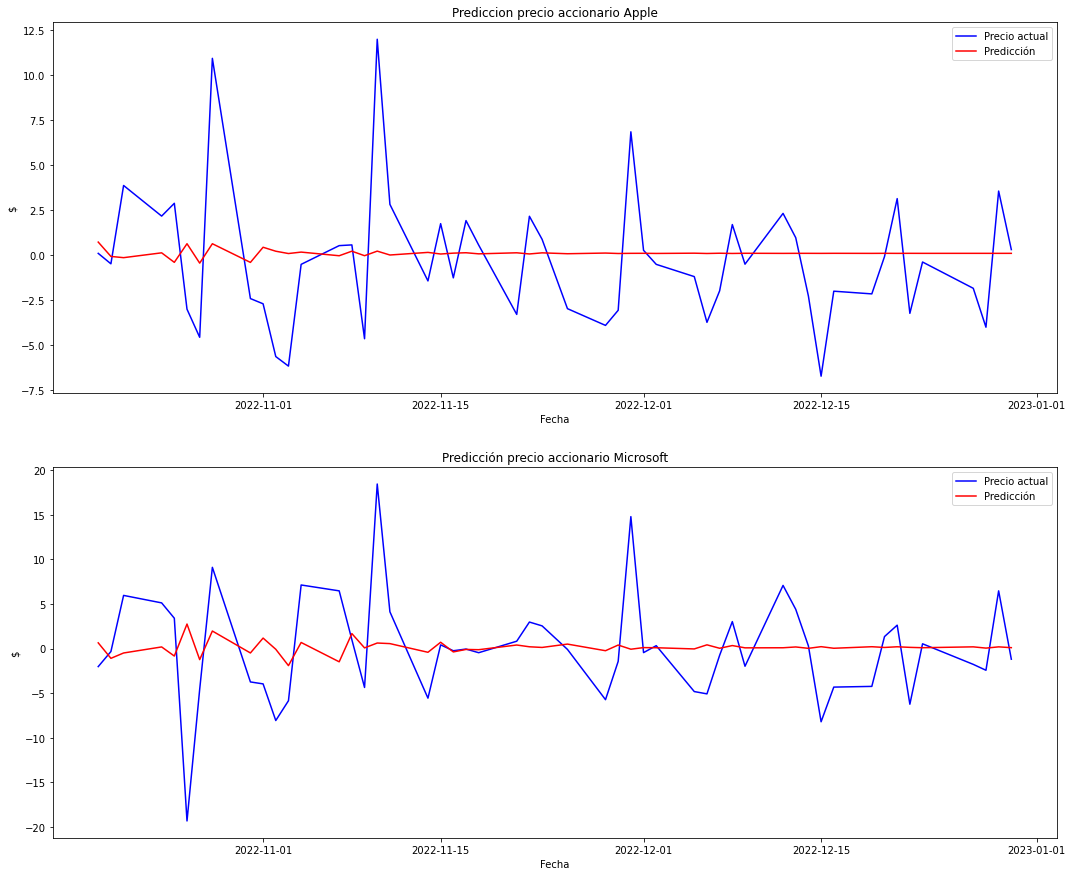

In [140]:
fig, ax = plt.subplots(2,1, figsize=(18, 15))
ax[0].plot(diff_test_aapl, label='Precio actual', c='b')
ax[0].plot(ar_predictions_aapl, c='r', label="Predicción")
ax[0].set_title('Prediccion precio accionario Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Precio actual', c='b')
ax[1].plot(ar_predictions_msft, c='r', label="Predicción")
ax[1].set_title('Predicción precio accionario Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Fecha', ylabel='$')
#plt.savefig('images/ar.png')
plt.show()


Para Microsoft hubo un aumento en el número de "atrasados", como se ve en la gráfica, a mayor aumento, más variaciones a largo plazo.